# DIABETES_PREDICTION

### About this Dataset
__Context__

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

__Content__

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

<img align="top"  width="500" height="300" src="https://raw.githubusercontent.com/satishgunjal/images/master/Ensemble_Learning.png">

## IMPORTING LIB.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import klib

## READING DATASET

In [2]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## DATA INSIGHTS

In [3]:
data.shape

(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
klib.describe

<module 'klib.describe' from 'C:\\Users\\Admin\\anaconda3\\lib\\site-packages\\klib\\describe.py'>

## CORRELATION DATA

In [9]:
klib.corr_mat(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


## HEAT MAP

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

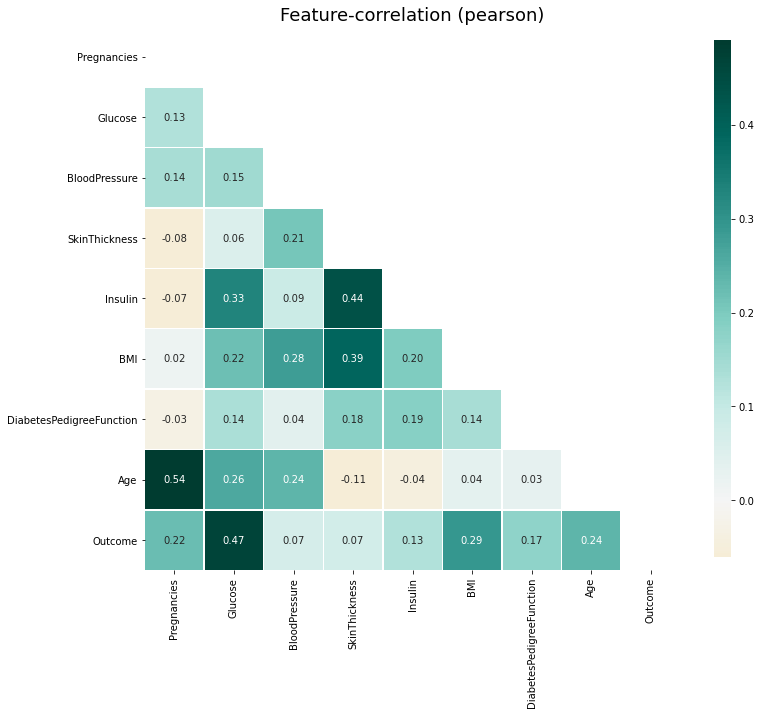

In [10]:
klib.corr_plot(data)

<AxesSubplot:xlabel='Age', ylabel='Density'>

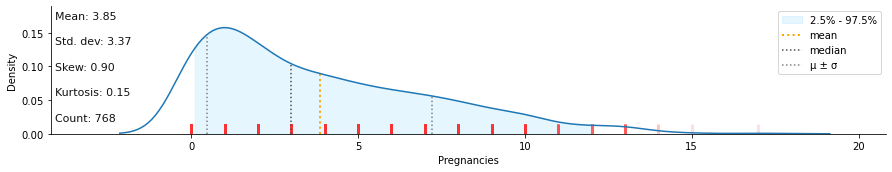

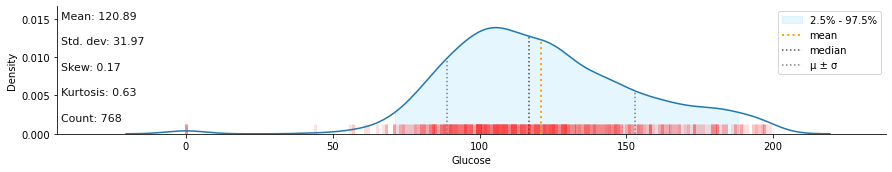

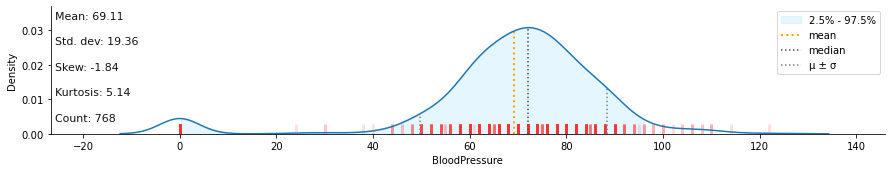

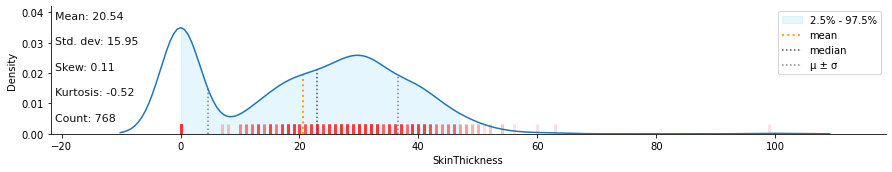

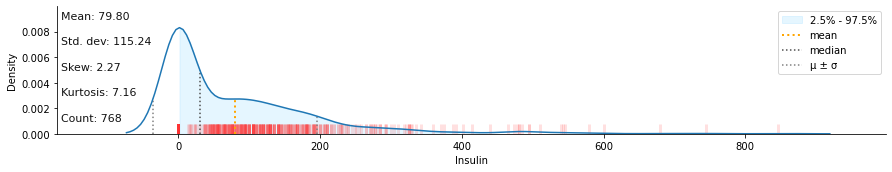

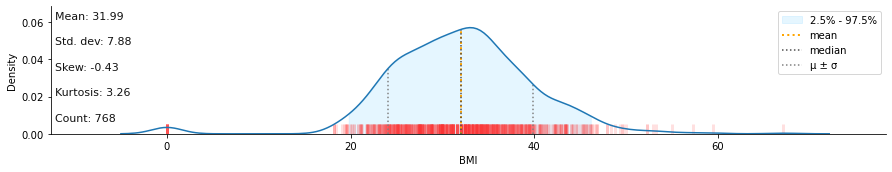

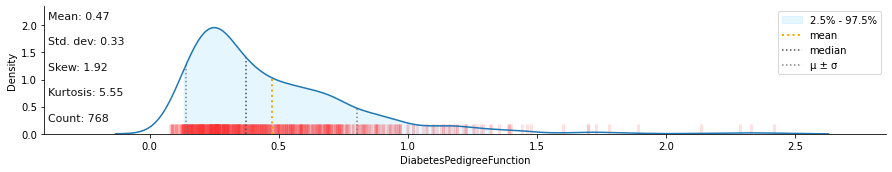

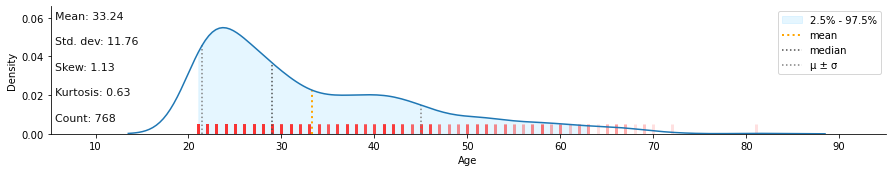

In [11]:
klib.dist_plot(data)

## HIST_PLOT WITH OUTCOMES

In [12]:
fig=plt.figure(figsize=(10,10))
def ploting_outcomes(column):
    data[data["Outcome"] == 0][column].hist(bins=35, color='blue', label='Have Diabetes = NO', alpha=0.6)
    data[data["Outcome"] == 1][column].hist(bins=35, color='red', label='Have Diabetes = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

<Figure size 720x720 with 0 Axes>

In [13]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

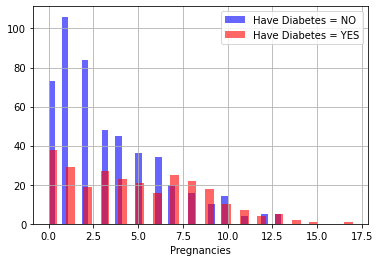

In [14]:
ploting_outcomes('Pregnancies')


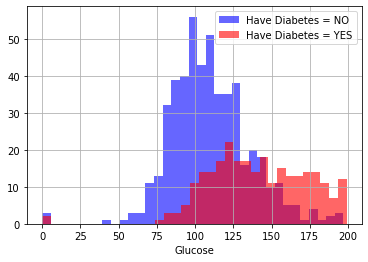

In [15]:
ploting_outcomes('Glucose')


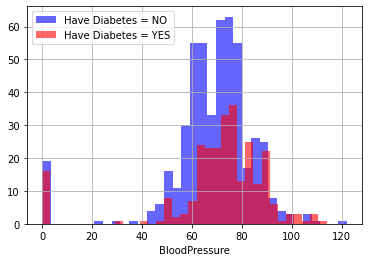

In [16]:
ploting_outcomes( 'BloodPressure')


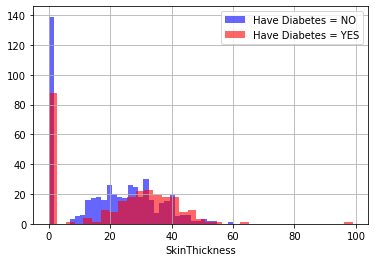

In [17]:
ploting_outcomes('SkinThickness')


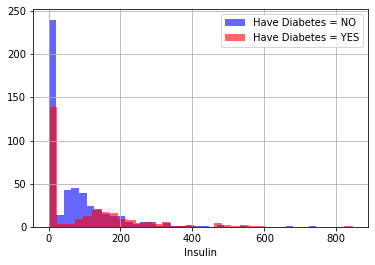

In [18]:
ploting_outcomes('Insulin')


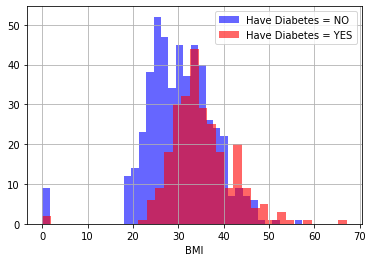

In [19]:
ploting_outcomes('BMI')


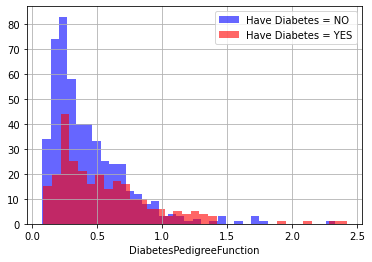

In [20]:
ploting_outcomes('DiabetesPedigreeFunction')


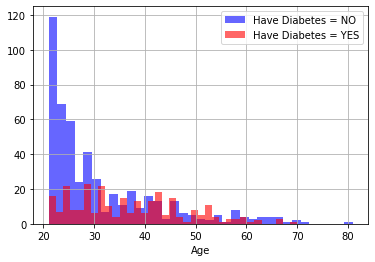

In [21]:
ploting_outcomes('Age')


<Figure size 2160x2160 with 0 Axes>

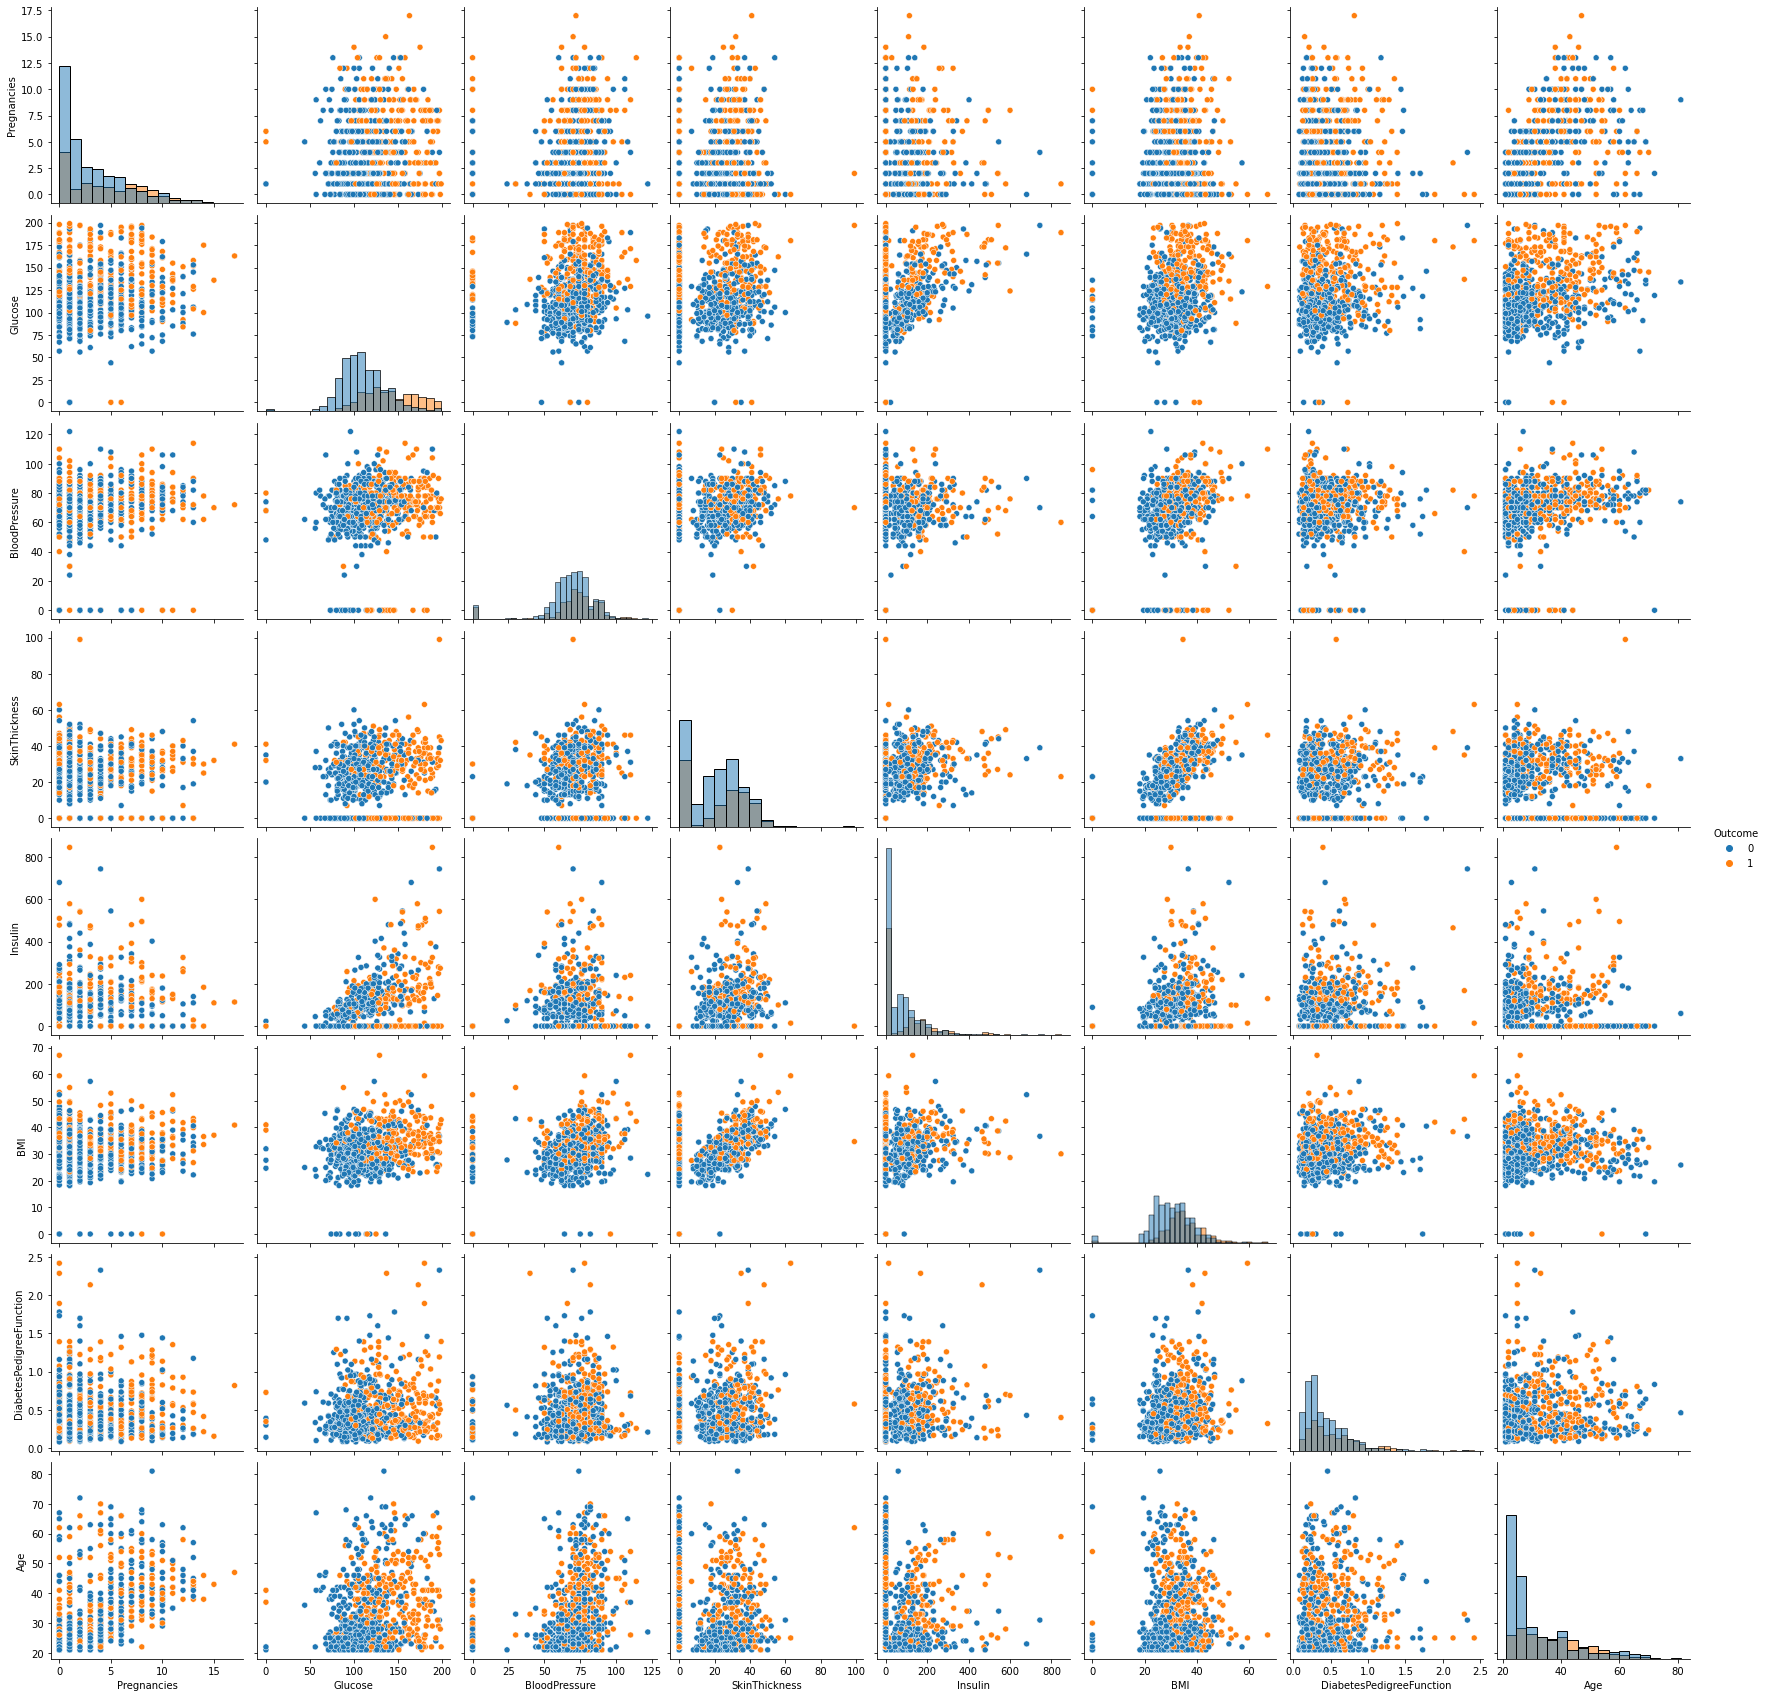

In [22]:
plt.figure(figsize=(30, 30))
sns.pairplot(data, hue='Outcome', height=3, diag_kind='hist')

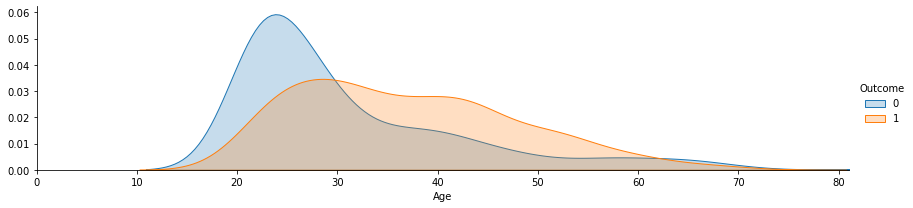

In [23]:
fig = sns.FacetGrid(data, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = data['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

## DEFINING DATA

In [24]:
X = data.drop('Outcome',axis=1)
Y = data.Outcome

## SEPERATING DATA_SETS INTO TRANING AND TEST DATA

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
print('X train size: ', X_train.shape)
print('y train size: ', Y_train.shape)
print('X test size: ', X_test.shape)
print('y test size: ', Y_test.shape)

X train size:  (537, 8)
y train size:  (537,)
X test size:  (231, 8)
y test size:  (231,)


## LOGISTIC REGRESSION

In [26]:
from sklearn.linear_model import LogisticRegression
Lr= LogisticRegression()
Lr.fit(X_train,Y_train)
Y_pred=Lr.predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[133,  17],
       [ 31,  50]], dtype=int64)

In [28]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.7922077922077922
Precision: 0.746268656716418
Recall: 0.6172839506172839


## ROC CURVE

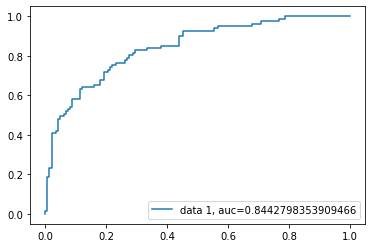

In [29]:
Y_pred_proba = Lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## SELFBUILT FUNX.

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, Y_train, Y_test):
    Y_test_pred = model.predict(X_test)
    Y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(Y_train, Y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(Y_train, Y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(Y_train, Y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(Y_test, Y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(Y_test, Y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(Y_test, Y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

## BAGGING
__Bagging or Bootstrap aggregating is an ensemble learning approach used to improve the stability and accuracy of machine learning algorithms. Since multiple model predictions are averaged together to form the final predictions, Bagging reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach, in case of regression problem we take mean of the output and in case of classification we take the majority vote. Bagging is more helpfull if we have over fitting (high variance) base models__

<img align="top"  width="1100" height="400" src="https://raw.githubusercontent.com/satishgunjal/images/master/Bootstrap_Sampling_ML.png">

*It is a resampling technique, where large numbers of smaller samples of the same size are repeatedly drawn, with replacement, from a single original sample.

*So the defination is simple to understand but "replacement" word may be confusing sometimes. Here 'replacement' word signifies that the same obervation may repeat more than once in a given sample, and hence this technique is also known as sampleing with replacement

*As you can see in above image we have training data with observations from X1 to X10. In first bootstrap training sample X6, X10 and X2 are repeated where as in second training sample X3, X4, X7 and X9 are repeated.

*Bootstrap sampleing helps us to generate random sample from given training data for each model in order to genralise the final estimation.
 
__So in case of Bagging we create multiple number of bootstrap samples from given data to train our base models. Each sample will contain training and test data sets which are different from each other and remember that training sample may contain duplicate observations.__

In [31]:

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, Y_train)

evaluate(bagging_clf, X_train, X_test, Y_train, Y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[350   0]
 [  0 187]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    350.0  187.0       1.0      537.0         537.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[125  25]
 [ 24  57]]
ACCURACY SCORE:
0.7879
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.838926   0.695122  0.787879    0.767024      0.788501
recall       0.833333   0.703704  0.787879    0.768519      0.787879
f1-score     0.836120   0.699387  0.787879    0.767753      0.788175
support    150.000000  81.000000  0.787879  231.000000    231.000000


In [32]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(Y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(Y_test, bagging_clf.predict(X_test)),
    },
}

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=101, n_estimators=2000)
rf_clf.fit(X_train, Y_train)
evaluate(rf_clf, X_train, X_test, Y_train, Y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[350   0]
 [  0 187]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    350.0  187.0       1.0      537.0         537.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[128  22]
 [ 30  51]]
ACCURACY SCORE:
0.7749
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.810127   0.698630  0.774892    0.754378      0.771030
recall       0.853333   0.629630  0.774892    0.741481      0.774892
f1-score     0.831169   0.662338  0.774892    0.746753      0.771968
support    150.000000  81.000000  0.774892  231.000000    231.000000


In [34]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=1000, max_features=7, random_state=42)
ex_tree_clf.fit(X_train, Y_train)
evaluate(ex_tree_clf, X_train, X_test, Y_train, Y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[350   0]
 [  0 187]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    350.0  187.0       1.0      537.0         537.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[126  24]
 [ 29  52]]
ACCURACY SCORE:
0.7706
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.812903   0.684211  0.770563    0.748557      0.767777
recall       0.840000   0.641975  0.770563    0.740988      0.770563
f1-score     0.826230   0.662420  0.770563    0.744325      0.768790
support    150.000000  81.000000  0.770563  231.000000    231.000000


## Boosting 
__In case of boosting, machine learning models are used one after the other and the predictions made by first layer models are used as input to next layer models. The last layer of models will use the predictions from all previous layers to get the final predictions. Unlike bagging, in case of boosting the base learners are trained in sequence on a weighted version of the data. Boosting is more helpful if we have biased base models.__

Boosting can be used to solve regression and classification problems.

<img align="top"  width="300" height="400" src="https://raw.githubusercontent.com/satishgunjal/images/master/Ensemble_Learning_Boosting.png">

In [35]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=50)
ada_boost_clf.fit(X_train, Y_train)
evaluate(ada_boost_clf, X_train, X_test, Y_train, Y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[312  38]
 [ 50 137]]
ACCURACY SCORE:
0.8361
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.861878    0.782857  0.836127    0.822368      0.834361
recall       0.891429    0.732620  0.836127    0.812024      0.836127
f1-score     0.876404    0.756906  0.836127    0.816655      0.834791
support    350.000000  187.000000  0.836127  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[122  28]
 [ 31  50]]
ACCURACY SCORE:
0.7446
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.797386   0.641026  0.744589    0.719206      0.742558
recall       0.813333   0.617284  0.744589    0.715309      0.744589
f1-score     0.805281   0.628931  0.744589    0.717106      0.743444
support    150.000000  81.000000  0.744589  231.000000    231.000000


In [36]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, Y_train)
evaluate(grad_boost_clf, X_train, X_test, Y_train, Y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[339  11]
 [ 24 163]]
ACCURACY SCORE:
0.9348
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.933884    0.936782  0.934823    0.935333      0.934893
recall       0.968571    0.871658  0.934823    0.920115      0.934823
f1-score     0.950912    0.903047  0.934823    0.926979      0.934244
support    350.000000  187.000000  0.934823  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[120  30]
 [ 26  55]]
ACCURACY SCORE:
0.7576
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.821918   0.647059  0.757576    0.734488      0.760604
recall       0.800000   0.679012  0.757576    0.739506      0.757576
f1-score     0.810811   0.662651  0.757576    0.736731      0.758859
support    150.000000  81.000000  0.757576  231.000000    231.000000


## VIOTING_CLASSIFIER

In [38]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, Y_train)

evaluate(voting, X_train, X_test, Y_train, Y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[329  21]
 [ 77 110]]
ACCURACY SCORE:
0.8175
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.810345    0.839695  0.817505    0.825020      0.820565
recall       0.940000    0.588235  0.817505    0.764118      0.817505
f1-score     0.870370    0.691824  0.817505    0.781097      0.808195
support    350.000000  187.000000  0.817505  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[133  17]
 [ 36  45]]
ACCURACY SCORE:
0.7706
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.786982   0.725806  0.770563    0.756394      0.765531
recall       0.886667   0.555556  0.770563    0.721111      0.770563
f1-score     0.833856   0.629371  0.770563    0.731613      0.762153
support    150.000000  81.000000  0.770563  231.000000    231.000000


# summary
__In this notebook we discovered ensemble machine learning algorithms for improving the performance of models on your problems.__
 
    * Bagging Ensembles including Bagged Decision Trees, Random Forest and Extra Trees.
    * Boosting Ensembles including AdaBoost and Stochastic Gradient Boosting.
    * Voting Ensembles for averaging the predictions for any arbitrary models.
   

# THE END !!